In [284]:
from PIL import Image, ImageDraw
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [285]:
image_1 = Image.open('/content/data/psyduck_0.jpg')
image_2 = Image.open('/content/data/psyduck_1.jpg')
image_3 = Image.open('/content/data/psyduck_2.jpg')
image_4 = Image.open('/content/data/psyduck_3.jpg')

In [286]:
def clustering_img(img, n_clust):
  img = np.array(img)
  clustering=KMeans(n_clusters=n_clust)

  data = [(x, y, img[x, y][0], img[x, y][1], img[x, y][2]) for x in range(img.shape[0]) for y in range(img.shape[1])]

  db_clusters=clustering.fit_predict(data);

  for p, c in zip(data, db_clusters):
    img[p[0], p[1]] = (int(clustering.cluster_centers_[c, 2]),
                        int(clustering.cluster_centers_[c, 3]),
                        int(clustering.cluster_centers_[c, 4]));

  plt.imshow(img)

  return (db_clusters, clustering.cluster_centers_)

In [287]:
def mcl(img, clusters, centers):
  pix = np.array(img)
  data = [(x, y, pix[x, y][0], pix[x, y][1], pix[x, y][2]) for x in range(pix.shape[0]) for y in range(pix.shape[1])]

  near = []
  for i, c in enumerate(centers):
      if (abs(c[2] - 212) < 35) and (abs(c[3] - 167) < 25) and (abs(c[4] - 70) < 30):
          near.append(i)

  pix_ = np.zeros(pix.shape, np.uint8)

  p_c = img.load()
  gray = np.array([[int((p_c[x, y][0] + p_c[x, y][1] + p_c[x, y][2]) / 3) for x in range(img.size[0])] for y in range(img.size[1])])

  # pix of selected clusters from source and other from gray pic
  for p, c in zip(data, clusters):
    if c in near:
      pix_[p[0], p[1]] = (int(pix[p[0], p[1]][0]),
                          int(pix[p[0], p[1]][1]),
                          int(pix[p[0], p[1]][2]))
    else:
      pix_[p[0], p[1]] = (int(gray[p[0], p[1]]),
                          int(gray[p[0], p[1]]),
                          int(gray[p[0], p[1]]))

  plt.imshow(pix_)

2

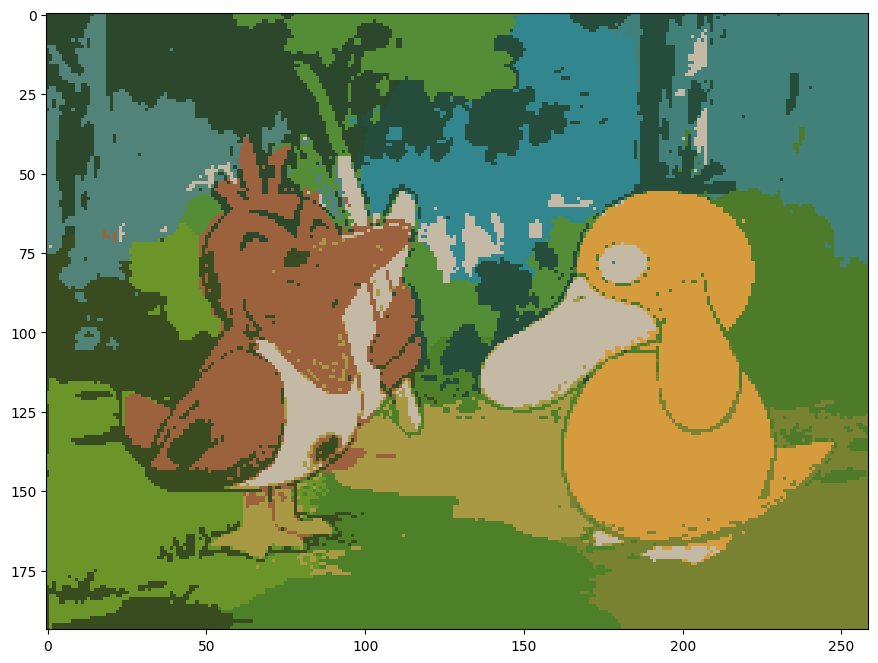

In [288]:
(clusters_1, centers_1) = clustering_img(image_1, 15)
1+1

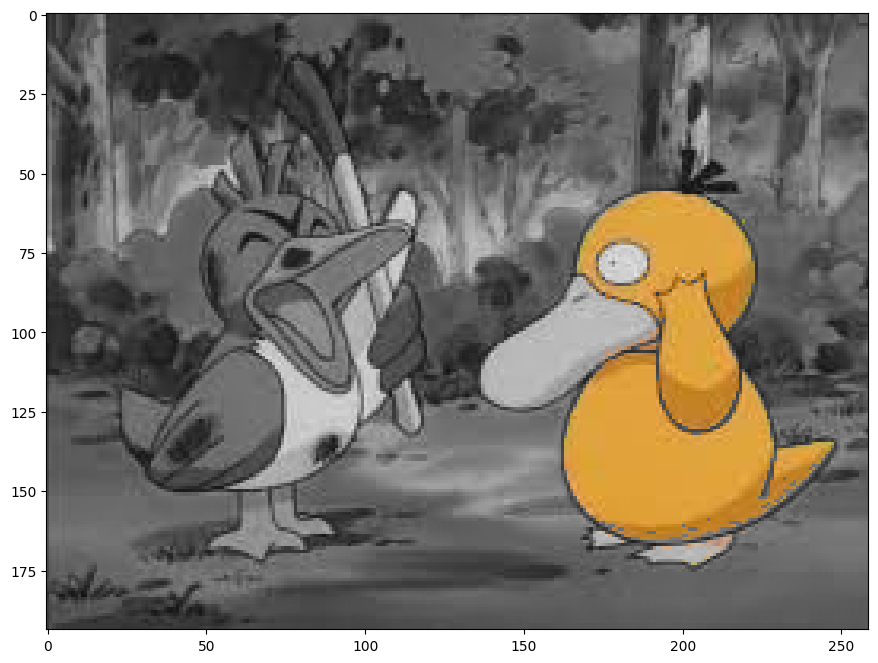

In [289]:
mcl(image_1, clusters_1, centers_1)

2

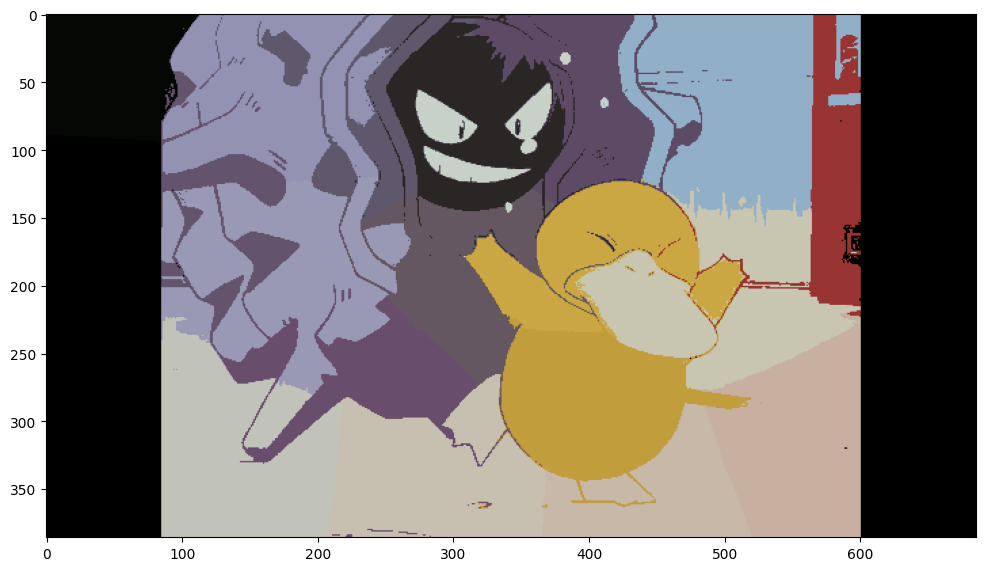

In [290]:
(clusters_2, centers_2) = clustering_img(image_2, 25)
1+1

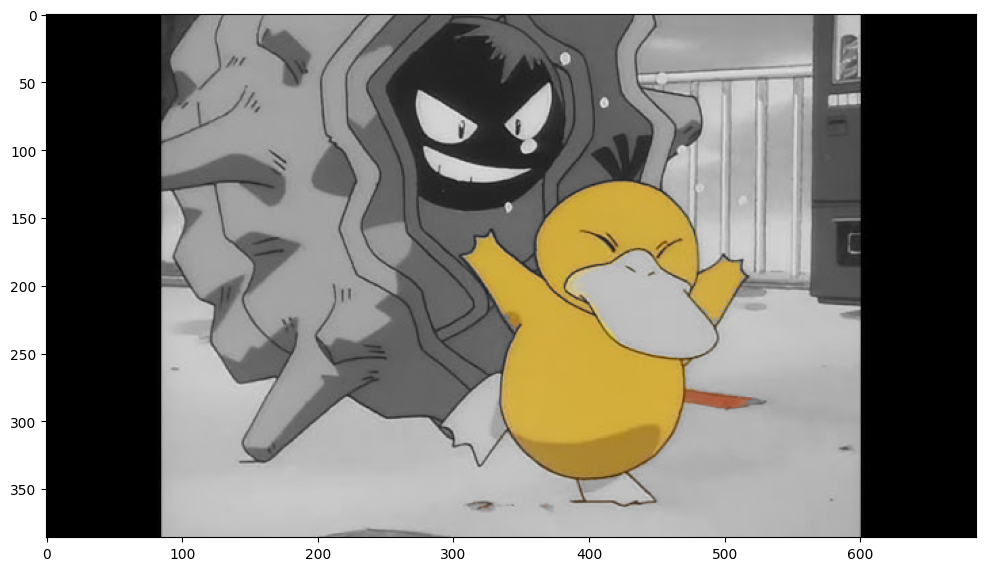

In [291]:
mcl(image_2, clusters_2, centers_2)

2

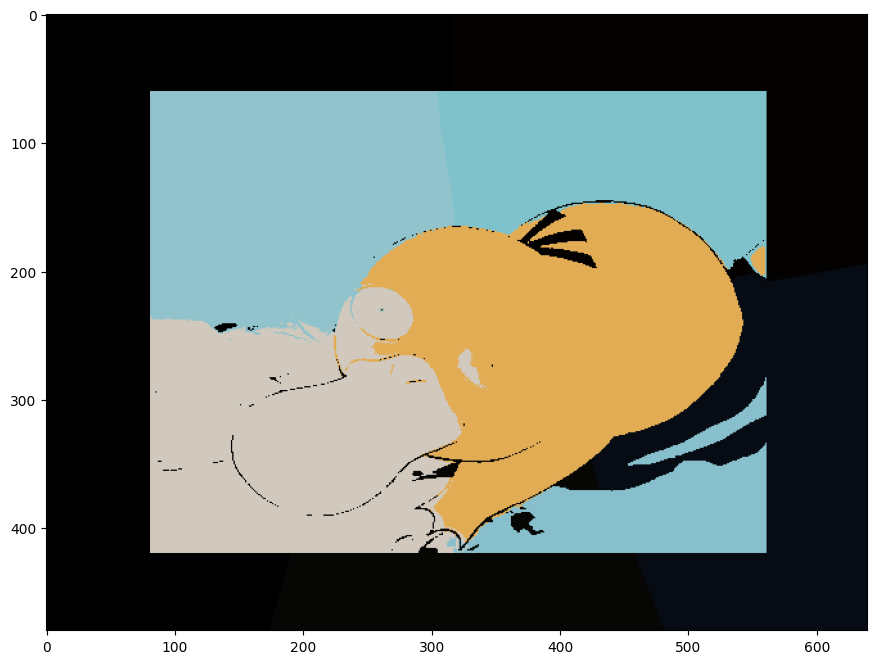

In [292]:
(clusters_3, centers_3) = clustering_img(image_3, 10)
1+1

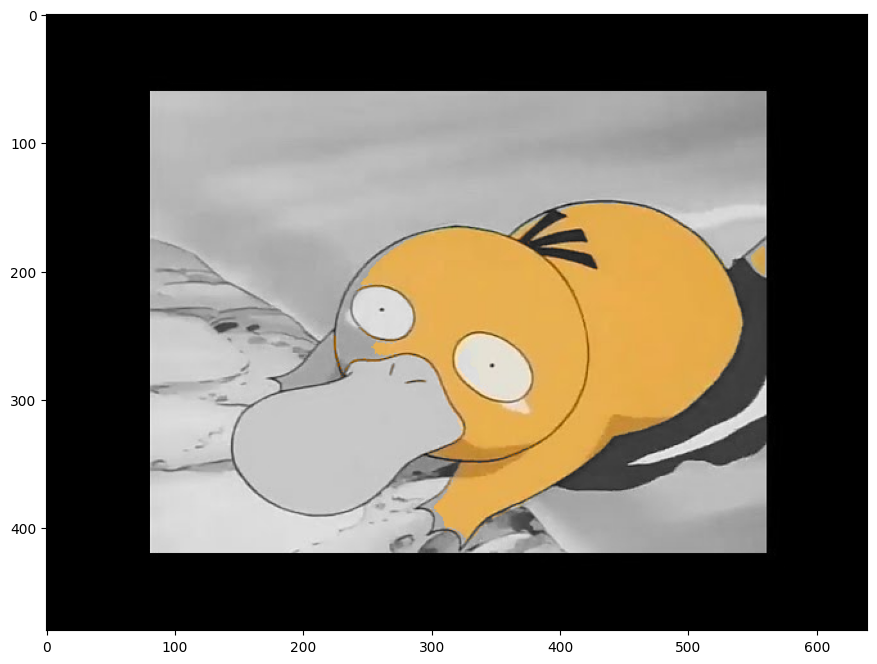

In [293]:
mcl(image_3, clusters_3, centers_3)

2

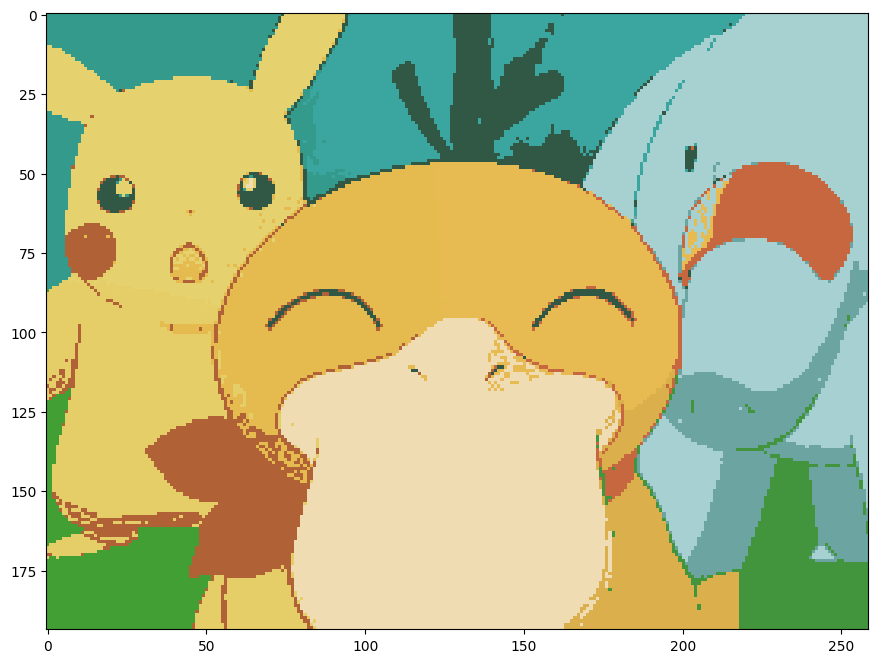

In [294]:
(clusters_4, centers_4) = clustering_img(image_4, 16)
1+1

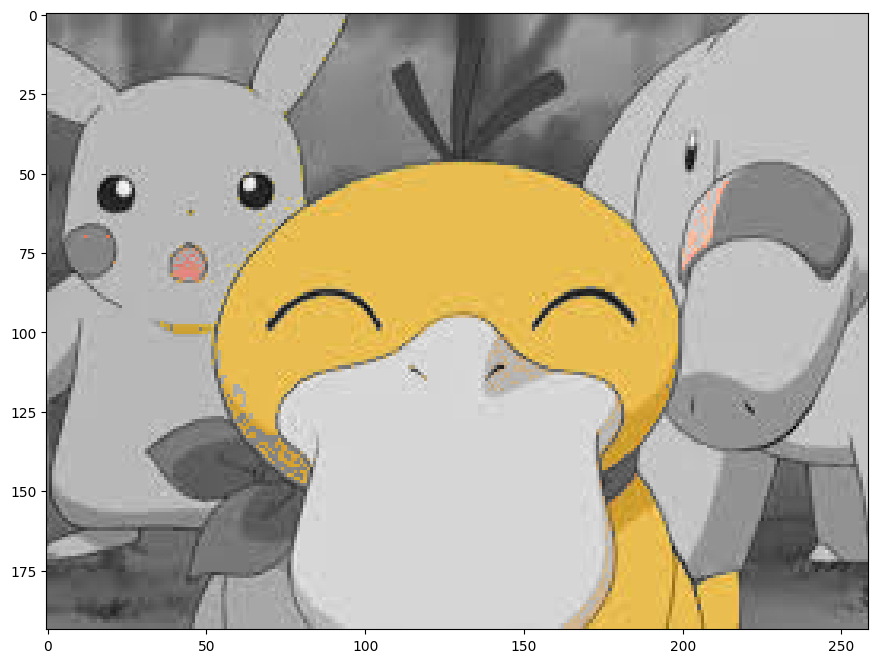

In [295]:
mcl(image_4, clusters_4, centers_4)